# Logistic Regression
#### by Oluwabamigbe Oni
<img width="100em" style="float:right" height="100em" src="http://www.pnet.co.za/upload_za/logo/E/logoEntelect-11249ZEN.gif"/>

## Fun Math :)

### Case Study

Entelect is giving internship opportunities to university students. Every student is interviewed to see if their personality and abilities are a good fit for the job. One student knows the GPA scores of 20 of her classmates and the result of their applications to the internship $\textbf{(i.e Accepted - 1, Not-Accepted - 2)}$. 

How does she create a model that effectively predicts a new classmates application status based on their GPA score?

### Problem Breakdown

Dependant Variable = $Acceptance (Y)$ - The value we try to predict?

- Between $\textbf{0}$ and $\textbf{1}$



Independant Variable = $GPA Score (X)$ - The feature used to determine $Y$

- Between $\textbf{0.0}$ and $\textbf{4.0}$


### What is Logistic Regression?

Logistic Regression is a useful classifier when you have binary dependent variables. Due to the dependent variables being dichotomous (binary), a linear regression $Y= WX + b$ attempt of best fit between the data point will result in an erroneous predictions for new x values.

##### Let's see a Linear regression solution attempted at the problem...



In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

gpaScores = pd.DataFrame({"GPA Score(X)":[0.5,0.9, 1, 1,1.4, 1.3, 1.5, 2, 2.1, 2.3, 2.4,2.5,2.6, 2.7,2.9, 3, 3.1, 3.3, 3.5, 3.6, 3.7, 3.8, 4, 4],
                    "Acceptance(Y)":[0.0,0, 0, 0,0, 0, 0, 0,  0,0,1, 1, 0, 1,1, 1,1, 1, 1, 1, 1, 1, 1, 1]})
gpaScores[["GPA Score(X)","Acceptance(Y)"]].head()

,GPA Score(X),Acceptance(Y)
0,0.5,0.0
1,0.9,0.0
2,1.0,0.0
3,1.0,0.0
4,1.4,0.0


##### Scatter plot of student's gpa scores vs. acceptance.

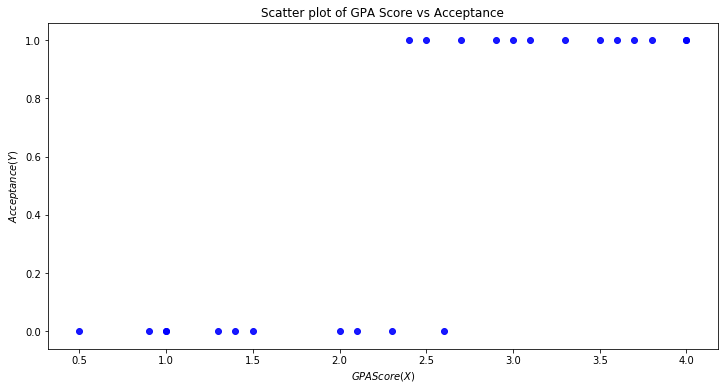

In [78]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(gpaScores["GPA Score(X)"], gpaScores["Acceptance(Y)"], alpha=0.9, c="blue")
ax.set_title("Scatter plot of GPA Score vs Acceptance")
ax.set_xlabel("$GPA Score(X)$")
ax.set_ylabel("$Acceptance(Y)$")
plt.show()

###### First Attempt to use linear regression for classification

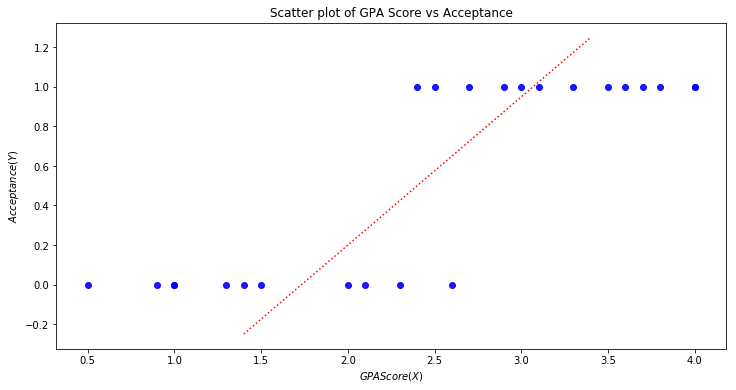

In [79]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(gpaScores["GPA Score(X)"], gpaScores["Acceptance(Y)"], alpha=0.9, c="blue")
ax.set_title("Scatter plot of GPA Score vs Acceptance")
ax.set_xlabel("$GPA Score(X)$")
ax.set_ylabel("$Acceptance(Y)$")
ax.plot(np.linspace(1.4, 3.4, 3), np.linspace(-0.25, 1.25, 3), c= "red", linestyle=':')
plt.show()

###### Second Attempt to use linear regression for classification

With Constraints: $y\geq0$ and $y\leq1$

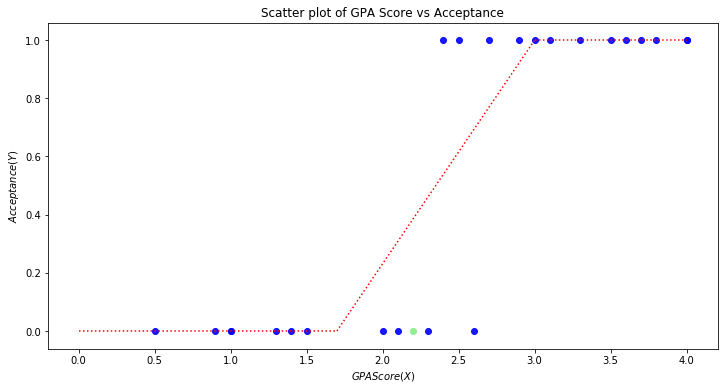

In [80]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(gpaScores["GPA Score(X)"], gpaScores["Acceptance(Y)"], alpha=0.9, c="blue")
ax.set_title("Scatter plot of GPA Score vs Acceptance")
ax.set_xlabel("$GPA Score(X)$")
ax.set_ylabel("$Acceptance(Y)$")
ax.plot(np.linspace(0, 1.7, 3), np.linspace(0, 0, 3), c= "red", linestyle=':')
ax.plot(np.linspace(1.7, 3.0, 3), np.linspace(0, 1, 3), c= "red", linestyle=':')
ax.plot(np.linspace(3.0, 4.0, 3), np.linspace(1, 1, 3), c= "red", linestyle=':')
ax.scatter([2.2],[0], c="lightgreen")
plt.show()

Linear regression gives us a formula $ f(x) = w_0x_0 + w_1x_1 + ... + w_nx_n$: 

- If we compute this for any possible vector $W$ and $X$, the value for $y$ is not categorical.

- After our modifications. We still have a uniform distribution of probability between each point.

Inorder to cater for this, we need some way to transform  y , so we decide to model y as a probability.
###### in Comes Logistic Regression...

### The reasoning behind Logistic Regression

<div style="float:left;display:inline-block;">
<img height="80%" width="15%"src="https://orig00.deviantart.net/94cc/f/2017/057/0/4/flip_coin_by_somniumfox-db0fl1s.gif"/>
<h4>Coin Toss probability</h4>
<ul>
    <li> <p>We say that the probability $p_i$ - is the probability of the coin 
        (i.e. independent variables($x$)) being heads($1$) in relation to the coin weight (dependent variables ($y$)).<p>
    </li>
    <li> 
        <span>Therefore we say $1 - p$ is ?</span>
    </li>
</ul>
</div>
<p style="font-size:50%;float:right">Gif from https://www.deviantart.com</p>

We then model the odds, which is $\frac{p}{1-p}$, and perform a log transform of the $ln(\frac{p}{1-p}) = y$ .

Why the log transform?

- Because we want the linear line to model the probabilities. between 0 and 1

- As:
$p$ -> $0, y$ -> -$ \infty$ and $p$ -> $1, y$ -> $\infty$
- Then we do: $ln(\frac{p}{1-p})^{-1} = y$. solving for p we get the sigmoid function. $p = \frac{1}{1+e^\alpha}$ our new $y$

Why are we doing all of this?
- For mathematical convenience. To find the estimated probabilities for p

In logistic regression we estimate $p_i$ for $w_0x_0 + w_1x_1 + ... + w_nx_n$:
so we get $y = \frac{1}{1+e^\alpha}$ where $\alpha = w_0x_0 + w_1x_1 + ... + w_nx_n$:

$y = \frac{1}{1+e^{w_0x_0 + w_1x_1 + ... + w_nx_n}}$, if $y$ >= 0.5 then 1, else 0

$y = \frac{1}{1+e^\alpha}$ is also known as the sigmoid function

#### Sigmoid function $y = \frac{1}{1+e^\alpha}$

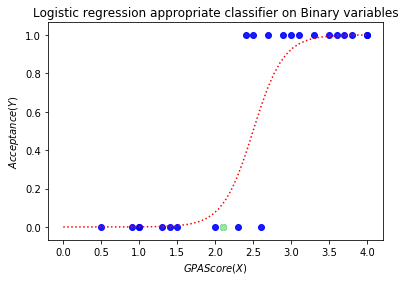

In [81]:
def sigmoid(w,x):
    bias = 12.5
    return 1.0 / (1.0 + np.exp(w*(x)+bias))
w = -5
p = [sigmoid(w,x) for x in np.linspace(0, 4, 50)]
plt.scatter(gpaScores["GPA Score(X)"], gpaScores["Acceptance(Y)"], alpha=0.9, c="blue")
plt.scatter([2.1],[0], c="lightgreen")
plt.title("Logistic regression appropriate classifier on Binary variables")
plt.xlabel("$GPA Score(X)$")
plt.ylabel("$Acceptance(Y)$")
plt.plot(np.linspace(0, 4, 50), p, c= "red", linestyle=':')
plt.show()

### Result:
From the above we see that $W$ vector = [-5], where our $w_0x_0$ or $bias$ = 12.5

### Goal?

Our goal is to find a similar $W$. This is basically what Training our algorithm calculates.
Using some loss function we are able to say, if with our current $W$ we are right or wrong about a prediction

#### Loss Function
Classification loss error:
- $E = \frac{1}{2N} {\sum_{n=1}^{N}}(h(x)_n - y_n) $

where:
n = each datapoint, N = total number of datapoint, h(x) = is our Log reg function output, y = actual values

But We need to get $W$ that is good enough to appropriately classify our data.

How do we find $W$?
- There are many ways. We will take a look at Gradient descent.

### Gradient Descent

This method states that:

$h(x) = \frac{1}{1+e^{w \cdot x}}$

$W =  W - \frac{\partial E}{\partial W} \frac{1}{2N} {\sum_{n=1}^{N}}(h(x)_n - y_n) $

=>$W$ <- $W - \frac{1}{2N} {\sum_{n=1}^{N}}(h(x)_n - y_n)x_nh^`(x)_n$

Simplistically the partial derivative of $W$ gives us the error component in our forecast.

We perform the update rules for all $W$ simultaneously

We continue until:
- the error is very minimal.
- the Max number of iterations is reached

## Code

We will try to find the appropriate $W$ using logistic Regression with Gradient Descent for optimisation.

Step 1: We split our data

In [82]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(gpaScores["GPA Score(X)"], gpaScores["Acceptance(Y)"], test_size = 0.3, random_state = 42)
x_train = pd.DataFrame(np.vstack((x_train,np.ones(x_train.shape[0]))).T)
x_test = pd.DataFrame(np.vstack((x_test,np.ones(x_test.shape[0]))).T)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

##### X_train

In [83]:
display(x_train.head(2))

,0,1
0,3.8,1.0
1,1.3,1.0


##### Y_train

In [84]:
display(y_train.head(2))

,Acceptance(Y)
21,1.0
5,0.0


#### Sigmoid Function  $h(x) = \frac{1}{1+e^\alpha}$

In [85]:
def sigmoid(X,W):
    return 1.0 / (1.0 + np.exp(np.dot(X, W)))

#### Partial Derivation of Sigmoid function $h^`(x)_n = h(x)(1 - h(x))$

In [86]:
def derivativeFunc(W,X):
    h = 1.0 / (1.0 + np.exp(np.dot(X, W)))
    return(h * (1.0 - h))


#### Logistic regression
First is the Logistic regression sigmoid Function we went through earlier, parameters W(Theta), x_testing, and alpha are passed in

In [87]:
def LR(W, x_testing):
    """
    W: parameters of logistic regression type classifier
    x_testing: test data
    returns the class label of x_testing using logistic regression type classifier
    """
    bias = 1
    h = sigmoid(x_testing, W)
    l = []
    for x in h:
        if x > 0.5:
            l.append(1.0)
        else:
            l.append(0.0)
    return l

#### Error function used to calculate error $\frac{1}{2N} {\sum_{n=1}^{N}}(h(x)_n - y_n) $

In [88]:
def LR_error(Theta, x_testing, y_testing):
    """
    returns empirical error of logistic regression type classifier on 
    (x_testing, y_testing)
    """
    h = sigmoid(x_testing,Theta)
    e = h-y_testing
    return e

#### Learning Theta Values with Gradient Descent
$W =  W - \frac{\partial E}{\partial W} \frac{1}{2N} {\sum_{n=1}^{N}}(h(x)_n - y_n) $

=>$W$ <- $W - \frac{1}{2N} {\sum_{n=1}^{N}}(h(x)_n - y_n)x_nh^`(x)_n$

Note: We will do an update of all Theta values at the same time after calculating it.

In [89]:
def performGradientDescent(Theta, x_training, y_training):
    originalTheta = Theta;
    error =  1;
    converge = False;
    previousError = 1;
    previousTheta = 1;
    errorCount = 0;
    alpha = 1
    iteration = 0
    N = x_training.shape[0]
    while(not converge):
        iteration += 1
        if(iteration != 1):
            alpha -=  alpha/ (np.mean(previousError)[0] /np.mean(error)[0]);
        error = LR_error(Theta, x_training, y_training)
        D = error * derivativeFunc(Theta, x_training)
        Theta = Theta - alpha * 1.0/N * np.dot(x_training.T, D)
        if(iteration != 1):
            if(np.mean(error)[0] <= np.mean(previousError)[0]):
                errorCount += 1;
        else: errorCount = 0;
        if(np.mean(error)[0] == 0.0) or (np.mean(error)[0] <= 0.3) or (iteration >= 1000):
            converge = True;
            break;
        previousError = error;
        previousTheta = Theta
        print('Logistic Regression empirical train error: {:.2f}'.format(np.abs(np.mean(error)[0])))

    if(iteration == 1):
        previousError = error;
        previousTheta = Theta
    return previousTheta,np.mean(previousError)[0]

In [90]:
def LR_learn(x_training, y_training):
    """
    returns the parameters Theta of logistic regression type classifier
    """
    print("\nLogistic Regression Learn: \n")
    #np.random.seed(99)
    ThetasAndErrors = [(np.random.randn(x_training.shape[1],1)*10,0.9),\
             (np.random.randn(x_training.shape[1],1)*10,0.9), \
             (np.random.randn(x_training.shape[1],1)*10,0.9), \
             (np.random.randn(x_training.shape[1],1)*10,0.9), \
             (np.random.randn(x_training.shape[1],1)*10,0.9)]
    minTheta, minError = ThetasAndErrors[0][0],ThetasAndErrors[0][1];
    for theta, error in ThetasAndErrors:
        theta,error = performGradientDescent(theta, x_training, y_training)
        if(minError >= error):
            minError = error;
            minTheta = theta;
            print("LOG REG Training Error: ", np.abs(minError));
    
    return minTheta


Step 1: Run Logistic Regression and Learn Theta value

In [91]:
W = LR_learn(x_train, y_train)


Logistic Regression Learn: 

Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic R

Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train erro

Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train erro

Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train erro

Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train erro

Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train erro

Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train erro

Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train erro

Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train error: 0.44
Logistic Regression empirical train erro

What is our training error?

In [92]:
e = LR_error(W, x_train, y_train)
print('Logistic Regression empirical train error: {:.2f}'.format(np.abs(np.mean(e)[0])))

Logistic Regression empirical train error: 0.56


What is our testing error?

In [93]:
e = LR_error(W, x_test, y_test)
print('Logistic Regression empirical test error: {:.2f}'.format(np.abs(np.mean(e)[0])))

Logistic Regression empirical test error: 0.50


#### Overall Stats

In [94]:
print("Theta Value: ", W)
print("Logistic Regression Prediction with W = "+ str(W) + "\n For X = ")
print(x_test)
print("Predictions...")
print(LR(W, x_test))
print("Actuals...")
print(y_test["Acceptance(Y)"])

Theta Value:  [[-0.95376483]
 [13.26269187]]
Logistic Regression Prediction with W = [[-0.95376483]
 [13.26269187]]
 For X = 
     0    1
0  2.1  1.0
1  3.1  1.0
2  0.5  1.0
3  3.5  1.0
4  2.5  1.0
5  2.3  1.0
6  2.7  1.0
7  0.9  1.0
Predictions...
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Actuals...
8     0.0
16    1.0
0     0.0
18    1.0
11    1.0
9     0.0
13    1.0
1     0.0
Name: Acceptance(Y), dtype: float64


#### Graph of Logistic Regression with Theta($W$) values from Gradient descent

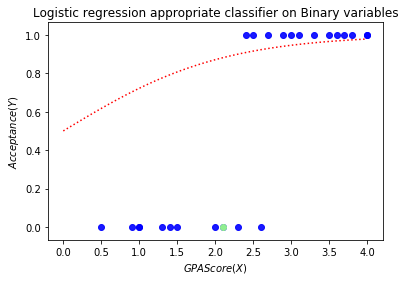

In [95]:
p = [sigmoid(x,W)[0] for x in np.linspace(0, 4, 50)]
plt.scatter(gpaScores["GPA Score(X)"], gpaScores["Acceptance(Y)"], alpha=0.9, c="blue")
plt.scatter([2.1],[0], c="lightgreen")
plt.plot(np.linspace(0, 4, 50), p, c= "red", linestyle=':')
plt.title("Logistic regression appropriate classifier on Binary variables")
plt.xlabel("$GPA Score(X)$")
plt.ylabel("$Acceptance(Y)$")
plt.show()

<h3>Thanks! Any Questions</h3>
<br/>
<img width="20%" style="float:center;margin:auto" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQQFw2wj_HMJ5kmDr1fI-kEXAgaIJs2rXPIl5-pqQq8OoOuPB3iSg"/>
<img width="7%" style="float:right" height="100em" src="http://www.pnet.co.za/upload_za/logo/E/logoEntelect-11249ZEN.gif"/>

<p>Feel free to email me on <strong>bami.tega@gmail.com.</strong></p>